In [1]:

#### Create Gym Data for regression in Python ####
import pandas as pd
import numpy as np
ColumnNames=['Hours','Calories', 'Weight']
DataValues=[[  1.0,   2500,   95],
             [  2.0,   2000,   85],
             [  2.5,   1900,   83],
             [  3.0,   1850,   81],
             [  3.5,   1600,   80],
             [  4.0,   1500,   78],
             [  5.0,   1500,   77],
             [  5.5,   1600,   80],
             [  6.0,   1700,   75],
             [  6.5,   1500,   70]]
#Create the Data Frame
GymData=pd.DataFrame(data=DataValues,columns=ColumnNames)
GymData.head()
 
#Separate Target Variable and Predictor Variables
TargetVariable='Weight'
Predictors=['Hours','Calories']
X=GymData[Predictors].values
y=GymData[TargetVariable].values
 
#Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.1/99.8 MB 1.1 MB/s eta 0:01:34
   ---------------------------------------- 0.3/99.8 MB 1.5 MB/s eta 0:01:05
   ---------------------------------------- 0.6/99.8 MB 2.6 MB/s eta 0:00:39
   ---------------------------------------- 0.7/99.8 MB 2.9 MB/s eta 0:00:35
   ---------------------------------------- 0.9/99.8 MB 3.0 MB/s eta 0:00:34
   ---------------------------------------- 1.1/99.8 MB 3.2 MB/s eta 0:00:32
    --------------------------------------- 1.3/99.8 MB 3.3 MB/s eta 0:00:30
    --------------------------------

In [5]:
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree')

In [6]:
print(RegModel)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)


In [7]:
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

C:\Users\reddy\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:57:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [8]:
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

R2 Value: 0.9999999183585404


In [9]:
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

Accuracy 90.7867270076976


<Axes: >

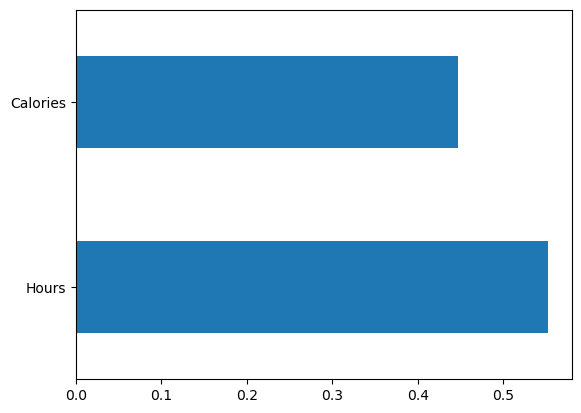

In [10]:
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [11]:
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=prediction
TestingDataResults.head()

Hours  Calories  Weight  PredictedWeight
0    6.0    1700.0      75        79.997498
1    2.0    2000.0      85        94.998734